## Iterative policy evaluation


## Line World

In [5]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from algos.dynamic_programming import iterative_policy_evaluation
from envs.line_world import (
    états, actions, récompenses, états_terminaux, p
)



Explication : 
- V(3) est une estimation du gain total attendu à partir de l'état 3 en suivant la politique π


 Itération 0
V(0) = 0 (état terminal)

 État 1 :
   Action 1 (proba 1.0) :
      s’ = 2, r = 0.0, V(s’) = 0.5148, gamma = 0.9999999
 -> Contribution action 1 = 0.514803
 Mise à jour : V(1) = 0.514803

 État 2 :
   Action 1 (proba 1.0) :
      s’ = 3, r = 0.0, V(s’) = 0.9269, gamma = 0.9999999
 -> Contribution action 1 = 0.926870
 Mise à jour : V(2) = 0.926870

 État 3 :
   Action 1 (proba 1.0) :
      s’ = 4, r = 1.0, V(s’) = 0.0000, gamma = 0.9999999
 -> Contribution action 1 = 1.000000
 Mise à jour : V(3) = 1.000000
V(4) = 0 (état terminal)

 max(delta) = 0.41206619

 Itération 1
V(0) = 0 (état terminal)

 État 1 :
   Action 1 (proba 1.0) :
      s’ = 2, r = 0.0, V(s’) = 0.9269, gamma = 0.9999999
 -> Contribution action 1 = 0.926870
 Mise à jour : V(1) = 0.926870

 État 2 :
   Action 1 (proba 1.0) :
      s’ = 3, r = 0.0, V(s’) = 1.0000, gamma = 0.9999999
 -> Contribution action 1 = 1.000000
 Mise à jour : V(2) = 1.000000

 État 3 :
   Action 1 (proba 1.0) :
      s’ = 4, r = 1.0, V

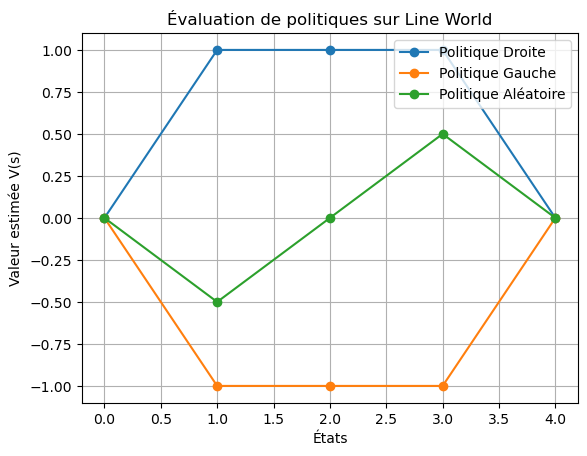

In [6]:

# Politiques à tester
pi_droite = np.zeros((len(états), len(actions)))
pi_droite[1, 1] = 1.0
pi_droite[2, 1] = 1.0
pi_droite[3, 1] = 1.0

pi_gauche = np.zeros((len(états), len(actions)))
pi_gauche[1, 0] = 1.0
pi_gauche[2, 0] = 1.0
pi_gauche[3, 0] = 1.0

pi_aléatoire = np.zeros((len(états), len(actions)))
pi_aléatoire[1, :] = [0.5, 0.5]
pi_aléatoire[2, :] = [0.5, 0.5]
pi_aléatoire[3, :] = [0.5, 0.5]

# Évaluation des politiques
V_droite = iterative_policy_evaluation(pi_droite, états, actions, récompenses, états_terminaux, p)
V_gauche = iterative_policy_evaluation(pi_gauche, états, actions, récompenses, états_terminaux, p)
V_alea = iterative_policy_evaluation(pi_aléatoire, états, actions, récompenses, états_terminaux, p)

# Affichage des résultats
for i in états:
    print(f"État {i} → Droite: {V_droite[i]:.3f}, Gauche: {V_gauche[i]:.3f}, Aléatoire: {V_alea[i]:.3f}")

# Courbe d’évolution des valeurs
plt.plot(états, V_droite, marker='o', label='Politique Droite')
plt.plot(états, V_gauche, marker='o', label='Politique Gauche')
plt.plot(états, V_alea, marker='o', label='Politique Aléatoire')
plt.title("Évaluation de politiques sur Line World")
plt.xlabel("États")
plt.ylabel("Valeur estimée V(s)")
plt.legend()
plt.grid(True)
plt.show()
